In [23]:
import torch.nn as nn
import torch.optim as optim
import numpy as np
from models.cnn import CNN
from models.resnet import ResNet
from models.inception import Inception
from models.densenet import DenseNet
from models.efficientnet import EfficientNet
from models.mobilenet import MobileNet
from models.vit import ViT
from utils.utils import load_data, save_model
from utils.utils import load_data, save_model
import matplotlib.pyplot as plt
import torchvision

In [24]:
from torchvision import datasets, transforms

In [5]:

def get_criterion():
    # Define the criterion
    criterion = nn.CrossEntropyLoss()
    return criterion

def get_optimizer(model):
    # Define the optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    return optimizer


In [40]:
trainloader, _, classes =  load_data(subsample=True, subsample_rate=0.01)

# Assuming trainloader is already defined and loaded
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Print the size of the first batch of images
print(images.size())

Files already downloaded and verified
Files already downloaded and verified
torch.Size([4, 3, 32, 32])


TypeError: 'DataLoader' object is not subscriptable

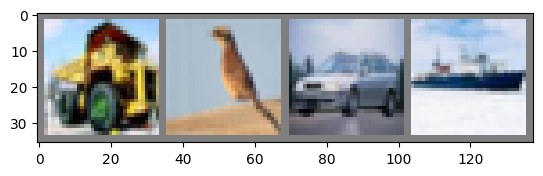

In [17]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

In [9]:
model_classes = [Inception, DenseNet, EfficientNet, MobileNet, ViT]
models = [model_class() for model_class in model_classes]
model = models[0]
criterion = get_criterion()
optimizer = get_optimizer(model)

In [10]:
model.train_model(trainloader, criterion, optimizer)


RuntimeError: Calculated padded input size per channel: (1 x 1). Kernel size: (3 x 3). Kernel size can't be greater than actual input size